In [3]:
import os
os.chdir('/home/emma/MSC_2017/MA5Q3/data(1)');

In [4]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [5]:
# G= nx.read_edgelist("data/lesmis.txt", nodetype=int, data=(('weight',float),)) # Read the network
G=nx.read_edgelist("data/zachary.txt", nodetype=int)

/home/emma/.local/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


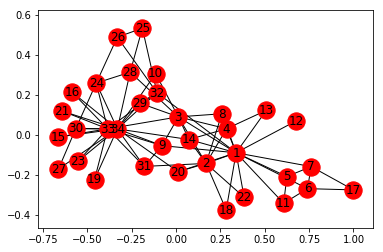

In [6]:
nx.draw_networkx(G)
plt.show(True)

In [7]:
print(G.nodes())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


In [8]:
print(G.edges())

[(1, 32), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 11), (1, 12), (1, 13), (1, 14), (1, 18), (1, 20), (1, 22), (2, 18), (2, 3), (2, 4), (2, 22), (2, 8), (2, 20), (2, 14), (2, 31), (3, 4), (3, 33), (3, 8), (3, 9), (3, 10), (3, 28), (3, 29), (3, 14), (4, 8), (4, 13), (4, 14), (5, 11), (5, 7), (6, 11), (6, 17), (6, 7), (7, 17), (9, 34), (9, 33), (9, 31), (10, 34), (14, 34), (15, 33), (15, 34), (16, 33), (16, 34), (19, 33), (19, 34), (20, 34), (21, 33), (21, 34), (23, 33), (23, 34), (24, 33), (24, 26), (24, 28), (24, 34), (24, 30), (25, 32), (25, 26), (25, 28), (26, 32), (27, 34), (27, 30), (28, 34), (29, 32), (29, 34), (30, 33), (30, 34), (31, 34), (31, 33), (32, 34), (32, 33), (33, 34)]


In [9]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 34
Number of edges: 78


In [10]:
vk = np.array(G.degree())
vk = vk[:,1]
print(vk)

[16  9 10  6  3  4  4  4  5  2  3  1  2  5  2  2  2  2  2  3  2  2  2  5  3
  3  2  4  3  4  4  6 12 17]


In [11]:
md = mean(vk)
print('Mean degree: ', md)

Mean degree:  4.58823529412


In [12]:
def degree_distribution(G):
    vk = np.array(G.degree())
    vk = vk[:,1] # we get only the degree values
    #vk = G.degree()
    # vk = np.array(list(vk.values()))
    maxk = vk.max() 
    mink = vk.min()
    kvalues= arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k), vector
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

In [13]:
ks, Pk = degree_distribution(G)

In [14]:
print(ks, Pk)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] [ 0.          0.02941176  0.32352941  0.17647059  0.17647059  0.08823529
  0.05882353  0.          0.          0.02941176  0.02941176  0.
  0.02941176  0.          0.          0.          0.02941176  0.02941176]


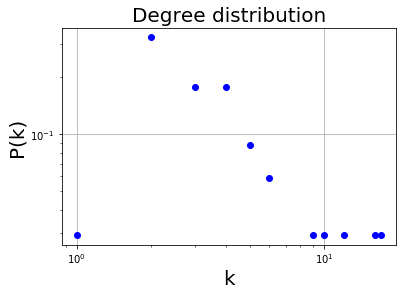

In [15]:
plt.figure()
plt.loglog(ks,Pk,'bo',basex=10,basey=10)
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)
plt.savefig('degree_dist.eps') #save the figure into a file
plt.show(True)

In [16]:
def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

In [17]:
k1 = momment_of_degree_distribution(G,1)
print("Mean degree = ", mean(vk))
print("First moment of the degree distribution = ", k1)

Mean degree =  4.58823529412
First moment of the degree distribution =  4.58823529412


In [18]:
k2 = momment_of_degree_distribution(G,2)
print("Second moment of the degree distribution = ", k2)

Second moment of the degree distribution =  35.6470588235


In [19]:
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

In [20]:
print("shannon entropy =", shannon_entropy(G))
print("normalised shannon entropy = ", shannon_entropy(G)/log(len(G))) # close to 1, so very complex network

shannon entropy = 2.85722209667
normalised shannon entropy =  0.810246733629


In [21]:
CC = (nx.transitivity(G)) 
print("Transitivity = ","%3.4f"%CC)

Transitivity =  0.2557


In [22]:
avc = nx.average_clustering(G)
print("Average clustering:", "%3.4f"%avc)

Average clustering: 0.5706


In [23]:
vcc = []
for i in G.nodes():
    vcc.append(nx.clustering(G, i))
vcc= np.array(vcc)
print('Clustering of all nodes:', vcc)

Clustering of all nodes: [ 0.15        0.33333333  0.24444444  0.66666667  0.66666667  0.5         0.5
  1.          0.5         0.          0.66666667  0.          1.          0.6
  1.          1.          1.          1.          1.          0.33333333
  1.          1.          1.          0.4         0.33333333  0.33333333
  1.          0.16666667  0.33333333  0.66666667  0.5         0.2
  0.1969697   0.11029412]


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


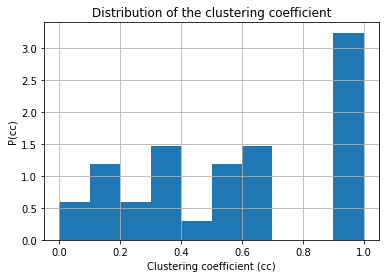

In [24]:
plt.figure()
plt.hist(vcc, bins  = 10, normed=True)
plt.title("Distribution of the clustering coefficient")
plt.ylabel("P(cc)")
plt.xlabel("Clustering coefficient (cc)")
plt.grid(True)
plt.savefig('clustering.eps') #save the figure into a file
plt.show()

In [25]:
if nx.is_connected(G) == True:
    l = nx.average_shortest_path_length(G)
    print("Average shortest path length:", "%3.4f"%l)

Average shortest path length: 2.4082


In [26]:
d = nx.diameter(G)
print('Network diameter:', d)

Network diameter: 5


In [27]:
E = nx.global_efficiency(G)
print('Network efficiency', E)

Network efficiency 0.4920083184789051


In [28]:
G.remove_node(1) #as no longer have a connected network
nx.average_shortest_path_length(G)

NetworkXError: Graph is not connected.

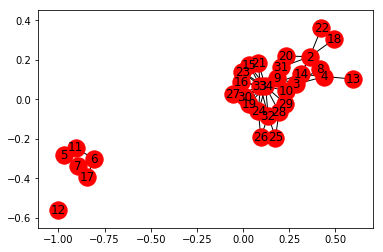

In [29]:
nx.draw_networkx(G)
plt.show()

In [30]:
Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True) #selects only the largest compoenent of network
G=Gcc[0]

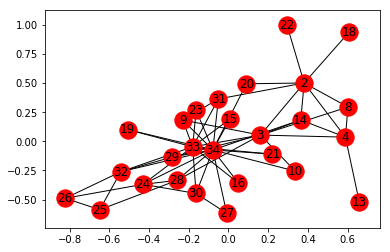

In [31]:
nx.draw_networkx(G)
plt.show()

In [32]:
if nx.is_connected(G) == True:
    l = nx.average_shortest_path_length(G)
    print("Average shortest path length:", "%3.4f"%l)

Average shortest path length: 2.2792


In [33]:
d = nx.diameter(G)
print('Network diameter:', d)

Network diameter: 5


In [34]:
G=nx.read_edgelist("data/zachary.txt", nodetype=int)
G = nx.convert_node_labels_to_integers(G, first_label=0) #convert labels to int and put them in sequential order

3.0


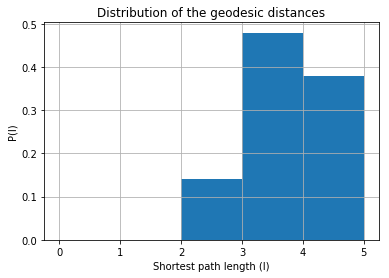

In [35]:
if nx.is_connected(G) == True:
    D = zeros(shape=(len(G),len(G))) # D is the matrix of distances, 
    vl = []
    for i in arange(0,len(G)):
        for j in arange(i+1, len(G)):
            if(i != j):
                aux = nx.shortest_path(G,i,j)
                dij = len(aux)
                D[i][j] = dij
                D[j][i] = dij
                vl.append(dij)
    x = range(0,d+1)
    print(D[3,4])
    plt.hist(vl, bins = x, normed=True)
    plt.title("Distribution of the geodesic distances")
    plt.ylabel("P(l)")
    plt.xlabel("Shortest path length (l)")
    plt.grid(True)
    plt.savefig('av_short_path.eps')
    plt.show(True)
else:
    print("The graph has more than one connected component")